## EDA

Working with the data...

1. Generate a word cloud of the abstracts and filling out the common words

2. Generate a basic hist of the labels identified and classified by LitCovid.

3. NER?

In [3]:
# packages to load in
import numpy as np
import pandas as pd
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import json
import pickle


import matplotlib.pyplot as plt

In [132]:
# load in all dat
# Clean and drop rows where no abstract or title was given
train = pd.read_csv('data/train.csv')
train = train.dropna(subset=['title', 'abstract'])
valid = pd.read_csv('data/valid.csv')
valid = valid.dropna(subset=['title', 'abstract'])
test = pd.read_csv('data/valid.csv')
test = test.dropna(subset=['title', 'abstract'])

In [228]:
train.head()

,Unnamed: 0,index,pmid,journal,title,abstract,keywords,label,pub_type,authors,date1,doi,date2,label_category
0,0,10030,32323279,Dtsch Med Wochenschr,[Renin-Angiotensin-System (RAS) and COVID-19 -...,"Twenty years ago, an enzyme homologous to the ...",NaN,Treatment;Mechanism,Journal Article;Review,"Kreutz, Reinhold;Abd El-Hady Algharably, Engi;...",NaN,10.1055/a-1152-3469,2020-04-24,title_abstract_abstract
1,1,8726,32678526,Prim Care Companion CNS Disord,Weaning From Exogenous Sedation in the Era of ...,The Psychiatric Consultation Service at Massac...,NaN,Prevention,Case Reports;Journal Article,"Jiang, Shixie;Petriceks, Aldis H;Burke, Heathe...",NaN,10.4088/PCC.20f02686,2020-07-18,title_abstract_abstract
3,3,5716,32816435,Ir Med J,Impact and Mechanism of Covid-19 on Mental Hea...,The Covid-19 pandemic has brought unprecedente...,NaN,NA,Journal Article,"Lynch, D;O'Brien, M;O'Byrne, L;Gavin, B;McNich...",NaN,NaN,2020-08-21,title_abstract_abstract
4,4,4727,32974671,Nutr Rev,The implications of vitamin D deficiency on CO...,Novel coronavirus disease 2019 (COVID-19) has ...,covid-19;nutrition;obesity;viral diseases;vita...,Treatment,Journal Article,"DeLuccia, Rosemary;Clegg, Deborah;Sukumar, Dee...",NaN,10.1093/nutrit/nuaa092,2020-09-26,abstract_only
5,5,27852,33206301,Radiol Med,COVID-19 pneumonia: computer-aided quantificat...,OBJECTIVE: To calculate by means of a computer...,covid-19;computer tool;tomography;volume quant...,Diagnosis,Journal Article,"Grassi, Roberto;Belfiore, Maria Paola;Montanel...",NaN,10.1007/s11547-020-01305-9,2020-11-19,difficult_weak


## Word Frequencies for all articles

Finding the word frequencies of all the input data.

In [34]:
train["alltext"] = train["title"] + " "+ train["abstract"]
traintext = " ".join(i for i in train.alltext)
valid["alltext"] = valid["title"] + " "+ valid["abstract"]
validtext = " ".join(i for i in valid.alltext)
test["alltext"] = test["title"] + " "+ test["abstract"]
testtext = " ".join(i for i in test.alltext)
alltext = traintext + " " + validtext + " " + testtext
alltext = alltext.lower()

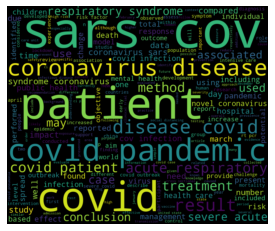

In [35]:
wordcloud = WordCloud(width=1200,height=1000).generate(alltext)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()
wordcloud.to_file("alltext_wordcloud.png")

Lots of repetitive names let's lemmalize and work again:


In [36]:
train_dict = pickle.load(open('../nlp_project/train.pkl', 'rb'))
test_dict = pickle.load(open('../nlp_project/test.pkl', 'rb'))
valid_dict = pickle.load(open('../nlp_project/valid.pkl', 'rb'))

In [85]:
lemma_word_list = list()
for i in train_dict.keys():
    lemma_word_list.extend(train_dict[i]["lemmas"])
for i in test_dict.keys():
    lemma_word_list.extend(test_dict[i]["lemmas"])
for i in valid_dict.keys():
    lemma_word_list.extend(valid_dict[i]["lemmas"])
a = (map(lambda x: x.lower(), lemma_word_list))
lemma_word_list = list(a)

In [86]:
from collections import Counter
counter = Counter(lemma_word_list)
counts = list(counter.values())
words = list(counter.keys())

In [90]:
values_grab = sorted(counts,reverse=True)[:50]
words_plot = list()
for i in values_grab:
    words_plot.append(words[counts.index(i)])

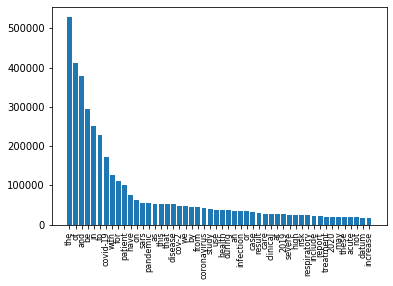

In [93]:
y_pos = np.arange(len(words_plot))
# Create bars
plt.bar(y_pos, values_grab)

# Create names on the x-axis
plt.xticks(y_pos, words_plot, rotation='vertical', fontsize=8)

plt.savefig('commonwords_after_Lemma.png',dpi=1600)
# Show graphic
plt.show()

## Text Classification Done and Labeling of the Articles

Here we look at the labeling done by Dr. Chen's group and see what their split is like

In [173]:
test.label.fillna('NA', inplace=True)
valid.label.fillna('NA', inplace=True)
train.label.fillna('NA', inplace=True)

In [174]:
alllabels = list()
alllabels = test['label'].to_list()
alllabels.extend(train['label'].to_list())
alllabels.extend(valid['label'].to_list())


In [175]:
alllabels_fin = str(alllabels).split(";")
#alllabels_fin = [item for sublist in alllabels_fin for item in sublist]

In [189]:
fin_list =list()
for element in alllabels:
    parts = element.split(';')
    fin_list.extend(parts) 

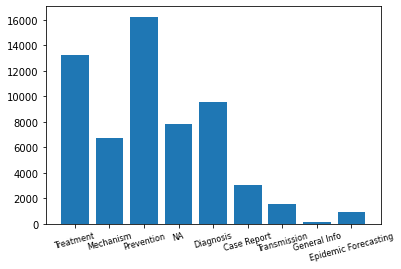

In [217]:
labcounter = Counter(fin_list)
labels_vals = list(labcounter.values())
labels_names = list(labcounter.keys())
y_posl = np.arange(len(labcounter.keys()))
# Create bars
fig, ax = plt.subplots()


plt.bar(y_posl, labels_vals)

# Create names on the x-axis
plt.xticks(y_posl, labels_names)
ax.tick_params(axis='x', labelsize=8, rotation=15)


plt.savefig('Label_assignment_for_Dataset.png',dpi=1600)
# Show graphic
plt.show()

In [204]:
labcounter

Counter({'Treatment': 13227,
         'Mechanism': 6708,
         'Prevention': 16243,
         'NA': 7788,
         'Diagnosis': 9538,
         'Case Report': 3017,
         'Transmission': 1585,
         'General Info': 165,
         'Epidemic Forecasting': 944})

In [224]:
test.shape[0] + train.shape[0] + valid.shape[0]

45128

In [227]:
sum(list(labcounter.values()))

59215

## A little more clean up

Here we want to remove some of the normal english words and replot


In [233]:
import nltk
from nltk.corpus import stopwords

In [242]:
rem_words = set(stopwords.words("english"))
cleanedlemmalist= [w for w in lemma_word_list if not w in rem_words]

In [245]:
cleanedcounter = Counter(cleanedlemmalist)
clcounts = list(cleanedcounter.values())
clwords = list(cleanedcounter.keys())

clvalues_grab = sorted(clcounts,reverse=True)[:50]
clwords_plot = list()
for i in clvalues_grab:
    clwords_plot.append(clwords[clcounts.index(i)])

In [ ]:
cly_pos = np.arange(len(clwords_plot))
# Create bars
plt.bar(cly_pos, clvalues_grab)

# Create names on the x-axis
plt.xticks(cly_pos, clwords_plot, rotation=90, fontsize=4)

plt.savefig('commonwords_after_Lemma_and_stopwords.png',dpi=1600)
# Show graphic
plt.show()